# Residuals

We test two ways to quantize the values

In [40]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')
with open('../../results/FINAL_2/CF_quantization.pkl', 'rb') as f:
    data = pickle.load(f)

In [41]:
cf_3 = []
cf_4 = []

for i in [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1.0]:
    cf_3.append(np.mean(data['conv_pq']['cf_' + str(i)]))
    cf_4.append(np.mean(data['conv_me']['cf_' + str(i)]))


<ipython-input-42-55e77d8068e0>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 1.0, 'Compression Factor depending on number of conv.layers and abs. error')

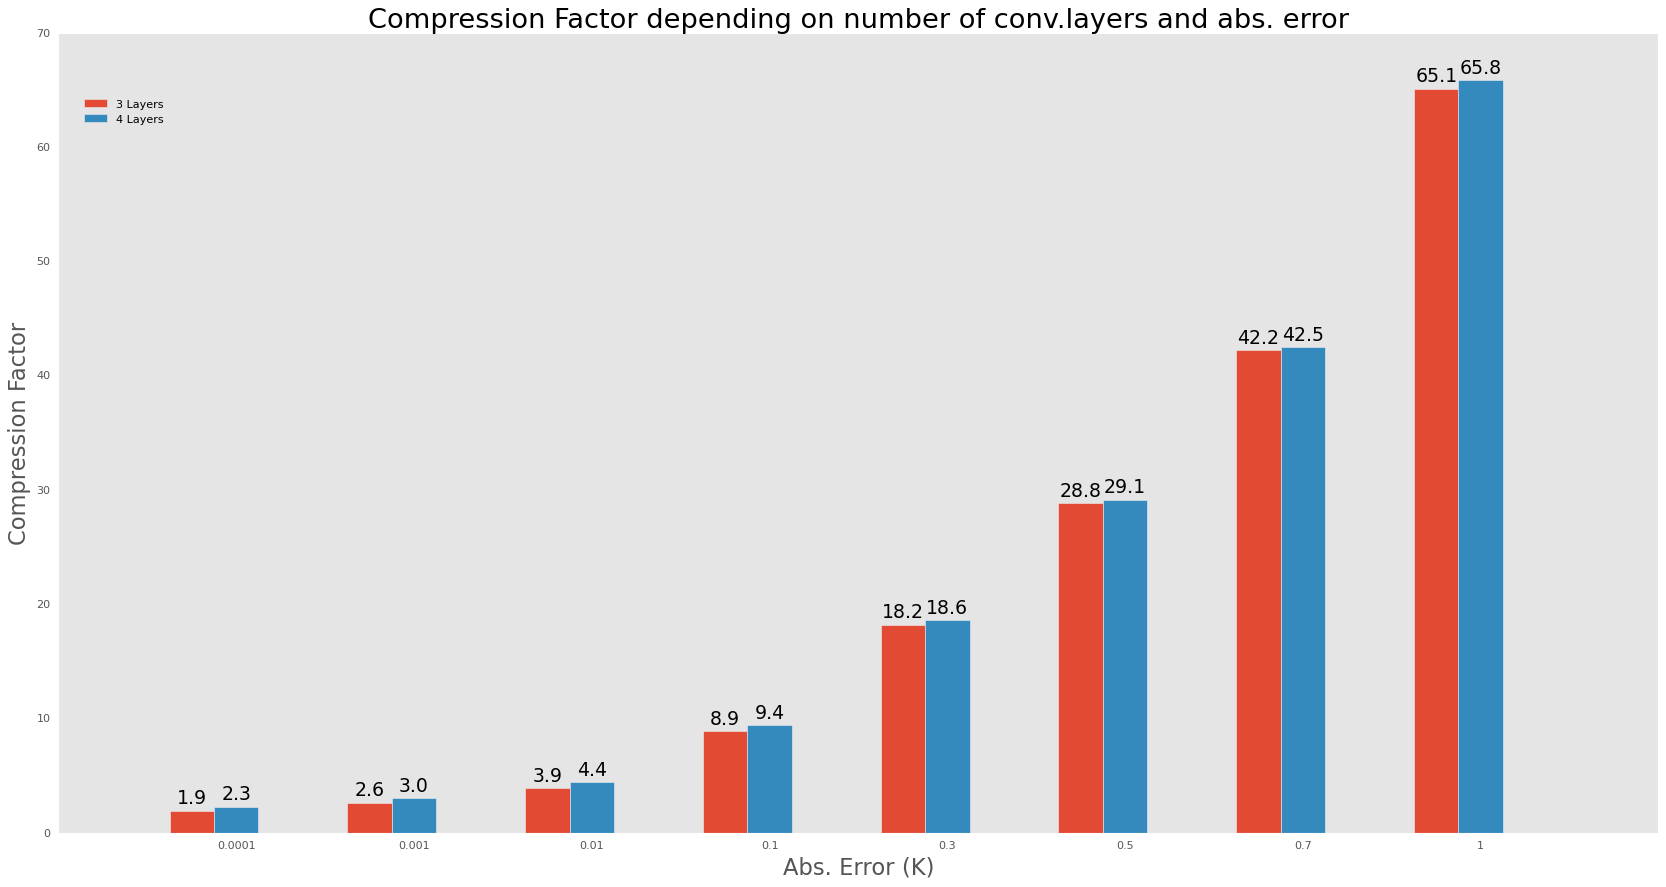

In [42]:
plt.rcParams.update({'font.size': 17})
fig = plt.figure(figsize=(20,10))
cf = np.arange(8)
ax = fig.add_axes([0,0,1,1])
pps = ax.bar(cf - 0.25, cf_3, width = 0.25, label = '3 Layers')
pps1= ax.bar(cf + 0.00, cf_4, width = 0.25, label = '4 Layers')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1:8] = ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1']
width = 0.25
for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
    
for p in pps1:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom') 
    
ax.set_xticklabels(labels)
fig.legend(bbox_to_anchor=(0.01, 1.03, 1, -0.1), loc=2,
           ncol=1)
plt.grid()
plt.xlabel('Abs. Error (K)')
plt.ylabel('Compression Factor')
plt.title('Compression Factor depending on number of conv.layers and abs. error')